# Varying Width Analysis

In [2]:

import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def group_data_by_metric(directory):
    # Pattern looks for - or _ followed by digits then 'mm'
    metric_pattern = re.compile(r"[-_](\d+)mm", re.IGNORECASE)

    # Storage: {metric: [(distance_array, counts_array), ...]}
    grouped_data = {}

    for fname in os.listdir(directory):
        if not fname.endswith(".dat"):
            continue

        match = metric_pattern.search(fname)
        if not match:
            continue # Skip files that don't have the w-Xmm metric

        metric = match.group(1)
        # print(metric)

        # --- Your existing reading logic ---
        data = pd.read_csv(
            os.path.join(directory, fname),
            sep=r"\s+",
            skiprows=1,
            names=["Distance", "Counts"]
        )
        dist_array = data["Distance"].to_numpy()

        midpoint = (dist_array[-1] - dist_array[0])/2
        dist_array = dist_array - midpoint

        counts_array = data["Counts"].to_numpy()
        # -----------------------------------

        if metric not in grouped_data:
            grouped_data[metric] = []

        # Add a tuple of the two arrays to the list for this metric
        grouped_data[metric].append((dist_array, counts_array))

    return grouped_data

def plot(grouped_data, savename):
    plt.figure()
    plt.title("Sweep Counts for Different Widths")
    plt.xlabel("Displacement (mm)")
    plt.ylabel("Counts")

    for metric, data_list in grouped_data.items():

        # data_list is a list of tuples: (distance_array, counts_array)
        for dist, counts in data_list:

            plt.plot(dist, counts, label=f"counts for width = {metric}mm")

    plt.savefig(savename)
    plt.show()




In [23]:

# Usage
WidthCalibrationJan14 = group_data_by_metric("./data/Width calibration - 2026-01-14")

Processing metric: 8mm
Number of files found for this metric: 1
Array shape: (16,)
Processing metric: 4mm
Number of files found for this metric: 1
Array shape: (21,)
Processing metric: 0mm
Number of files found for this metric: 1
Array shape: (15,)
Processing metric: 2mm
Number of files found for this metric: 1
Array shape: (15,)
Processing metric: 6mm
Number of files found for this metric: 1
Array shape: (16,)


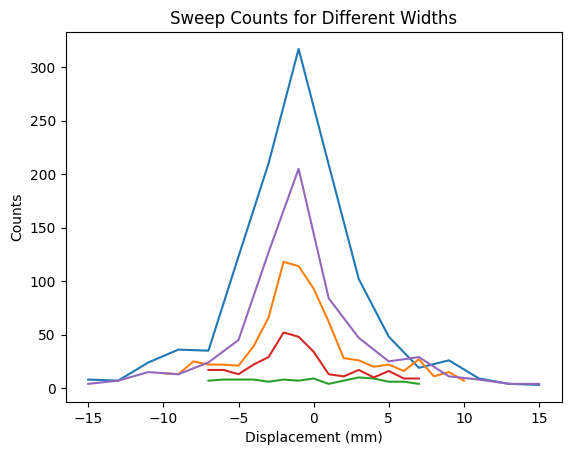

In [24]:
plot(WidthCalibrationJan14, "Width Calibration Jan14")

In [ ]:
WidthCalibrationJan16 = group_data_by_metric("./data/Resolution Measurements - 2026-01-16")